# Modeling Cross Section Data with KNN

In [3]:
import pandas as pd
import numpy as np
import os
import sys

# This allows us to import the nucml utilities
sys.path.append("../..")

import nucml.exfor.data_utilities as exfor_utils 
import nucml.datasets as nuc_data 
import nucml.model.utilities as model_utils

In [4]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(nuc_data)
importlib.reload(model_utils)
print("Finish re-loading scripts.")

Finish re-loading scripts.


# Loading Training Results

In [5]:
results_b0 = pd.read_csv("knn_results_B0.csv")
# results_b1 = pd.read_csv("1_KNN/knn_results_B1.csv")

# Loading Best Models

In [9]:
best_b0 = model_utils.get_best_models_df(results_b0, keep_first=True)
# best_b1 = model_utils.get_best_models_df(results_b1, keep_first=True)

In [10]:
best_b0

id distance_metric mt_strategy      normalizer  train_mae  train_mse  \
75   20       euclidean     one_hot  quantilenormal   0.025789   0.010846   
206   9       manhattan     one_hot        poweryeo   0.025917   0.011012   
206   9       manhattan     one_hot        poweryeo   0.025917   0.011012   

     train_evs  train_mae_m  train_r2   val_mae  ...  test_mae  test_mse  \
75    0.985945          0.0  0.985945  0.120770  ...  0.120936  0.064027   
206   0.985723          0.0  0.985723  0.116457  ...  0.117396  0.061993   
206   0.985723          0.0  0.985723  0.116457  ...  0.117396  0.061993   

     test_evs  test_mae_m   test_r2  \
75   0.913956    0.043920  0.913956   
206  0.917614    0.041405  0.917614   
206  0.917614    0.041405  0.917614   

                                            model_path  training_time  \
75   E:\ML_Models_EXFOR\KNN_B0\k20_distance_euclide...    4424.581484   
206  E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...    4550.139933   
206  E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...    4550.139933   

                                           scaler_path  \
75   E:\ML_Models_EXFOR\KNN_B0\k20_distance_euclide...   
206  E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...   
206  E:\ML_Models_EXFOR\KNN_B0\k9_distance_manhatta...   

                                              run_name    tag  
75   k20_distance_euclidean_quantilenormal_one_hot_...  Train  
206       k9_distance_manhattan_poweryeo_one_hot_B0_v1    Val  
206       k9_distance_manhattan_poweryeo_one_hot_B0_v1   Test  

[3 rows x 24 columns]

In [11]:
def filter_by_parameters(results_df, param_dict):
    for i in param_dict:
        results_df = results_df[results_df[i] == param_dict[i]]
    return results_df

In [12]:
def get_parameters_from_line(results_df, model="knn"):
    if model.lower() == "knn":
        distance_metric = results_df.distance_metric.values[0]
        mt_strategy = results_df.mt_strategy.values[0]
        normalizer = results_df.normalizer.values[0]
        param_dict = {"distance_metric":distance_metric, "mt_strategy":mt_strategy, "normalizer":normalizer}
    return param_dict

In [13]:
training_iterations = filter_by_parameters(results_b0, get_parameters_from_line(best_b0.iloc[[0]]))

In [14]:
training_iterations

id distance_metric mt_strategy      normalizer  train_mae  train_mse  \
40   9       euclidean     one_hot  quantilenormal   0.025889   0.010986   
41  13       euclidean     one_hot  quantilenormal   0.025857   0.010907   
42   5       euclidean     one_hot  quantilenormal   0.026127   0.011385   
43   1       euclidean     one_hot  quantilenormal   0.029373   0.022366   
44  17       euclidean     one_hot  quantilenormal   0.025799   0.010865   
50  10       euclidean     one_hot  quantilenormal   0.025871   0.010956   
51  14       euclidean     one_hot  quantilenormal   0.025856   0.010899   
52   6       euclidean     one_hot  quantilenormal   0.026050   0.011247   
53  18       euclidean     one_hot  quantilenormal   0.025798   0.010859   
54   2       euclidean     one_hot  quantilenormal   0.027758   0.013921   
60  11       euclidean     one_hot  quantilenormal   0.025865   0.010943   
61  15       euclidean     one_hot  quantilenormal   0.025850   0.010889   
62   7       euclidean     one_hot  quantilenormal   0.025993   0.011154   
64  19       euclidean     one_hot  quantilenormal   0.025791   0.010852   
65   3       euclidean     one_hot  quantilenormal   0.026679   0.012190   
68  12       euclidean     one_hot  quantilenormal   0.025850   0.010914   
71  16       euclidean     one_hot  quantilenormal   0.025840   0.010874   
72   8       euclidean     one_hot  quantilenormal   0.025954   0.011090   
75  20       euclidean     one_hot  quantilenormal   0.025789   0.010846   
76   4       euclidean     one_hot  quantilenormal   0.026317   0.011638   

    train_evs  train_mae_m  train_r2   val_mae  ...    val_r2  test_mae  \
40   0.985746          0.0  0.985746  0.119209  ...  0.915713  0.119505   
41   0.985854          0.0  0.985854  0.119600  ...  0.915862  0.119845   
42   0.985247          0.0  0.985247  0.119920  ...  0.914990  0.121043   
43   0.971397          0.0  0.971396  0.141616  ...  0.883421  0.142960   
44   0.985919          0.0  0.985919  0.120314  ...  0.916104  0.120468   
50   0.985785          0.0  0.985785  0.119195  ...  0.915810  0.119483   
51   0.985862          0.0  0.985862  0.119749  ...  0.915803  0.119962   
52   0.985422          0.0  0.985422  0.119230  ...  0.915976  0.120346   
53   0.985925          0.0  0.985925  0.120461  ...  0.916007  0.120620   
54   0.982004          0.0  0.982004  0.126735  ...  0.904491  0.128356   
60   0.985801          0.0  0.985801  0.119263  ...  0.915867  0.119536   
61   0.985874          0.0  0.985874  0.119865  ...  0.915787  0.120096   
62   0.985544          0.0  0.985544  0.118891  ...  0.916712  0.120046   
64   0.985937          0.0  0.985937  0.120601  ...  0.915963  0.120778   
65   0.984211          0.0  0.984211  0.122794  ...  0.910799  0.124183   
68   0.985836          0.0  0.985836  0.119340  ...  0.915922  0.119627   
71   0.985894          0.0  0.985894  0.119998  ...  0.915748  0.120224   
72   0.985626          0.0  0.985626  0.118615  ...  0.917305  0.119880   
75   0.985945          0.0  0.985945  0.120770  ...  0.915821  0.120936   
76   0.984913          0.0  0.984913  0.120470  ...  0.913836  0.122011   

    test_mse  test_evs  test_mae_m   test_r2  \
40  0.064490  0.914551    0.041784  0.914550   
41  0.063902  0.914666    0.042630  0.914665   
42  0.066472  0.911437    0.041740  0.911436   
43  0.093504  0.880061    0.047633  0.880060   
44  0.063931  0.914224    0.043419  0.914224   
50  0.064295  0.914738    0.041981  0.914738   
51  0.063889  0.914613    0.042798  0.914612   
52  0.065496  0.912608    0.041669  0.912607   
53  0.063947  0.914141    0.043580  0.914141   
54  0.075917  0.900262    0.042191  0.900261   
60  0.064195  0.914788    0.042134  0.914788   
61  0.063867  0.914595    0.042950  0.914594   
62  0.064990  0.913179    0.041820  0.913178   
64  0.063973  0.914069    0.043808  0.914069   
65  0.070314  0.907000    0.042089  0.906999   
68  0.064153  0.914754    0.042299  0.914754   
71  0.063848  0

In [14]:
b0_train_model, b0_train_scaler = model_utils.load_model_and_scaler(best_b0.iloc[[0]])
# b1_train_model, b1_train_scaler = model_utils.load_model_and_scaler(best_b1.iloc[[0]])

# Loading EXFOR Data

In [15]:
df_b0, _, _, _, _, to_scale_b0, _ = nuc_data.load_exfor(pedro=True, basic=0)
# df_b1, _, _, _, _, to_scale_b1, _ = nuc_data.load_exfor(pedro=True, basic=1)

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: True
INFO:root: LOG: True
INFO:root: BASIC: 0
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4184115, 8)
INFO:root:Splitting dataset into training and testing...
INFO:root:Normalizing dataset...
INFO:root:Fitting new scaler.


In [43]:
df_b0.shape

(4184115, 40)

# Predicting XS for Cl

In [17]:
cl_b0 = exfor_utils.predicting_nuclear_xs_v2(
    df_b0, 17, 35, 103, b0_train_model, to_scale_b0, b0_train_scaler, show=True, save=True, 
    path="Figures/KNN/B0_cl35_np.png", get_endf=True, log=True, save_both=True)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 40)


In [18]:
# cl_b1 = exfor_utils.predicting_nuclear_xs_v2(
#     df_b1, 17, 35, 103, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=True, 
#     path="Figures/KNN/B1_cl35_np.png", get_endf=True, log=True, save_both=True)

# Uranium Predictions

In [19]:
order_dict=  {"endf":3, "exfor_ml_original":2, "exfor_ml":4, "exfor_new":1}

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/U233/endfb8.0/tables/xs/n-U233-MT018.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 15345 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (94567, 40)


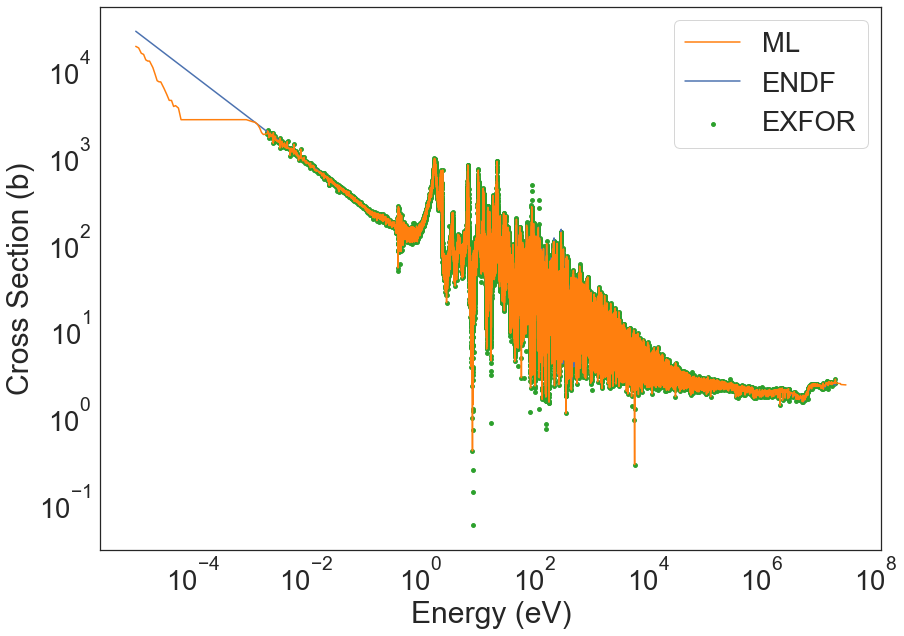

In [20]:
u_b0 = exfor_utils.predicting_nuclear_xs_v2(
    df_b0, 92, 233, 18, b0_train_model, to_scale_b0, b0_train_scaler, show=True, save=True, 
    path="Figures/KNN/B0_u233_fission.png", get_endf=True, log=True, save_both=True,
    plotter="plt", order_dict=order_dict)

In [21]:
# u_b1 = exfor_utils.predicting_nuclear_xs_v2(
#     df_b1, 92, 233, 18, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=True, 
#     path="Figures/KNN/B1_u233_fission.png", get_endf=True, log=True, save_both=True,
#     plotter="plt", order_dict=order_dict)

# Loading Newly Measured Chlorine (n,p) Unseen Data 

These data points are not in the current EXFOR data package and will be used to test the new modeling capabilities.

In [209]:
new_cl_data_kwargs = {"Z":17, "A":35, "MT":103, "log":True, "scale":True, "scaler":knn_train_scaler, "to_scale":to_scale, "one_hot":True}
new_cl_data = exfor_utils.load_newdata("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df_b1, **new_cl_data_kwargs)
new_cl_data.head()

INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (12, 43)


Energy      Data         Z         N     A  Atomic_Mass_Micro  \
0  6.383815 -1.779892 -1.129089 -1.113723 -1.12       3.496885e+07   
1  6.383815 -1.707744 -1.129089 -1.113723 -1.12       3.496885e+07   
2  6.401401 -1.583359 -1.129089 -1.113723 -1.12       3.496885e+07   
3  6.401401 -1.590067 -1.129089 -1.113723 -1.12       3.496885e+07   
4  6.411620 -1.350665 -1.129089 -1.113723 -1.12       3.496885e+07   

   Nucleus_Radius  Neutron_Nucleus_Radius_Ratio  MT_1  MT_101  ...  MT_33  \
0        4.088833                      0.195655     0       0  ...      0   
1        4.088833                      0.195655     0       0  ...      0   
2        4.088833                      0.195655     0       0  ...      0   
3        4.088833                      0.195655     0       0  ...      0   
4        4.088833                      0.195655     0       0  ...      0   

   MT_4  MT_41  MT_51  MT_9000  MT_9001  Center_of_Mass_Flag_Center_of_Mass  \
0     0      0      0        0        0                                   0   
1     0      0      0        0        0                                   0   
2     0      0      0        0        0                                   0   
3     0      0      0        0        0                                   0   
4     0      0      0        0        0                                   0   

   Center_of_Mass_Flag_Lab  Element_Flag_I  Element_Flag_N  
0                        1               1               0  
1                        1               1               0  
2                        1               1               0  
3                        1               1               0  
4                        1               1               0  

[5 rows x 43 columns]

In [213]:
new_cl = exfor_utils.predicting_nuclear_xs_v2(
    df_b1, 17, 35, 103, b1_train_model, to_scale_b1, b1_train_scaler, show=True, save=False, 
    path="Figures/KNN/B1_chlorine_35_np_new.png", get_endf=True, 
    log=True, new_data=new_cl_data, save_both=True)

INFO:root:EVALUATION: Extracting data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.
INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
INFO:root:Extracting samples from dataframe.
INFO:root:Scaling dataset...
INFO:root:EXFOR extracted DataFrame has shape: (215, 43)
